# Library

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt

In [10]:
params_dir = "../config/params.yaml"

In [11]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [12]:
params = load_params(params_dir)

# Load Dataset

In [15]:
x_train = joblib.load("../data/processed/x_train.pkl")
y_train = joblib.load("../data/processed/y_train.pkl")

In [16]:
x_train

,gender,age,married,number_of_dependents,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
824,Female,68,Yes,0,5,68,None,Yes,1.98,Yes,...,Yes,One Year,Yes,Credit Card,96.55,6581.90,0.0,0,134.64,6716.54
1985,Female,29,No,0,0,1,Offer E,Yes,13.04,No,...,Yes,Month-to-Month,Yes,Credit Card,69.95,69.95,0.0,0,13.04,82.99
3164,Male,64,No,0,0,25,Offer C,Yes,8.31,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,84.80,2043.45,0.0,0,207.75,2251.20
2238,Male,70,No,0,0,47,None,Yes,44.08,Yes,...,Yes,One Year,Yes,Credit Card,86.05,3865.60,0.0,0,2071.76,5937.36
5405,Female,29,No,0,0,6,None,No,-999.00,Unknown,...,Yes,One Year,Yes,Credit Card,49.25,255.60,0.0,0,0.00,255.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,Female,22,No,0,0,15,Offer D,Yes,45.84,Yes,...,Unknown,Month-to-Month,Yes,Credit Card,25.40,399.60,0.0,0,687.60,1087.20
143,Male,64,Yes,0,6,52,Offer B,Yes,41.34,Yes,...,Yes,One Year,Yes,Credit Card,81.40,4354.45,0.0,0,2149.68,6504.13
2703,Female,57,No,0,0,5,None,Yes,6.17,No,...,Unknown,Month-to-Month,No,Credit Card,19.85,108.05,0.0,0,30.85,138.90
4836,Male,43,Yes,2,3,11,None,Yes,16.67,No,...,Unknown,Month-to-Month,Yes,Bank Withdrawal,20.45,250.80,0.0,0,183.37,434.17


In [17]:
y_train

824     Churned
1985    Churned
3164    Churned
2238     Stayed
5405     Stayed
         ...   
4718    Churned
143      Stayed
2703    Churned
4836     Stayed
3883    Churned
Name: customer_status, Length: 4612, dtype: object

In [18]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset

,gender,age,married,number_of_dependents,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
824,Female,68,Yes,0,5,68,None,Yes,1.98,Yes,...,One Year,Yes,Credit Card,96.55,6581.90,0.0,0,134.64,6716.54,Churned
1985,Female,29,No,0,0,1,Offer E,Yes,13.04,No,...,Month-to-Month,Yes,Credit Card,69.95,69.95,0.0,0,13.04,82.99,Churned
3164,Male,64,No,0,0,25,Offer C,Yes,8.31,Yes,...,Month-to-Month,Yes,Bank Withdrawal,84.80,2043.45,0.0,0,207.75,2251.20,Churned
2238,Male,70,No,0,0,47,None,Yes,44.08,Yes,...,One Year,Yes,Credit Card,86.05,3865.60,0.0,0,2071.76,5937.36,Stayed
5405,Female,29,No,0,0,6,None,No,-999.00,Unknown,...,One Year,Yes,Credit Card,49.25,255.60,0.0,0,0.00,255.60,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,Female,22,No,0,0,15,Offer D,Yes,45.84,Yes,...,Month-to-Month,Yes,Credit Card,25.40,399.60,0.0,0,687.60,1087.20,Churned
143,Male,64,Yes,0,6,52,Offer B,Yes,41.34,Yes,...,One Year,Yes,Credit Card,81.40,4354.45,0.0,0,2149.68,6504.13,Stayed
2703,Female,57,No,0,0,5,None,Yes,6.17,No,...,Month-to-Month,No,Credit Card,19.85,108.05,0.0,0,30.85,138.90,Churned
4836,Male,43,Yes,2,3,11,None,Yes,16.67,No,...,Month-to-Month,Yes,Bank Withdrawal,20.45,250.80,0.0,0,183.37,434.17,Stayed


# EDA

## Data Type Checking

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4612 entries, 824 to 3883
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4612 non-null   object 
 1   age                                4612 non-null   int64  
 2   married                            4612 non-null   object 
 3   number_of_dependents               4612 non-null   int64  
 4   number_of_referrals                4612 non-null   int64  
 5   tenure_in_months                   4612 non-null   int64  
 6   offer                              4612 non-null   object 
 7   phone_service                      4612 non-null   object 
 8   avg_monthly_long_distance_charges  4612 non-null   float64
 9   multiple_lines                     4612 non-null   object 
 10  internet_service                   4612 non-null   object 
 11  internet_type                      4612 non-null   obj

## Missing Data Checking

From previous exploration, we know that some values are missing. 
- missing_value_avg_monthly_long_distance_charges: 644
- missing_value_avg_monthly_gb_download: 1344
- missing_value_multiple_lines: 644
- missing_value_internet_type: 1344
- missing_value_online_security: 1344
- missing_value_online_backup: 1344
- missing_value_device_protection_plan: 1344
- missing_value_premium_tech_support: 1344
- missing_value_streaming_tv: 1344
- missing_value_streaming_movies: 1344
- missing_value_streaming_music: 1344
- missing_value_unlimited_data: 1344

And we have replaced missing values for the categorical variable to "Unknown" and numerical to -999 in the previous notebook

In [22]:
# replace -999 to NaN
dataset.replace(-999, np.nan, inplace = True)

In [23]:
# check nulll values
dataset.isna().sum()

gender                                 0
age                                    0
married                                0
number_of_dependents                   0
number_of_referrals                    0
tenure_in_months                       0
offer                                  0
phone_service                          0
avg_monthly_long_distance_charges    457
multiple_lines                         0
internet_service                       0
internet_type                          0
avg_monthly_gb_download              948
online_security                        0
online_backup                          0
device_protection_plan                 0
premium_tech_support                   0
streaming_tv                           0
streaming_movies                       0
streaming_music                        0
unlimited_data                         0
contract                               0
paperless_billing                      0
payment_method                         0
monthly_charge  

## Data Range Checking

In [24]:
# check data range
dataset.describe()

,age,number_of_dependents,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,4612.000000,4612.000000,4612.000000,4612.000000,4155.000000,3664.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.740676,0.470729,2.021249,34.438205,25.570813,26.428221,64.903664,2420.170455,2.058742,7.003469,798.211281,3223.326464
std,16.853122,0.967152,3.024010,23.875642,14.296428,19.727886,31.046237,2250.377715,8.128928,25.586963,856.205106,2840.220696
min,19.000000,0.000000,0.000000,1.000000,1.020000,2.000000,-10.000000,19.100000,0.000000,0.000000,0.000000,23.240000
25%,32.750000,0.000000,0.000000,12.000000,13.085000,13.000000,35.500000,535.187500,0.000000,0.000000,106.582500,835.595000
50%,46.000000,0.000000,0.000000,32.000000,25.740000,21.000000,70.950000,1566.825000,0.000000,0.000000,476.695000,2397.835000
75%,60.000000,0.000000,3.000000,56.250000,37.945000,30.000000,90.400000,3991.562500,0.000000,0.000000,1270.905000,5098.725000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11868.340000


## Skewed Data Checking

In [25]:
# check skewness
dataset.skew(numeric_only = True)

age                                  0.156627
number_of_dependents                 2.116076
number_of_referrals                  1.387283
tenure_in_months                     0.159186
avg_monthly_long_distance_charges    0.004621
avg_monthly_gb_download              1.177573
monthly_charge                      -0.337602
total_charges                        0.892264
total_refunds                        4.237307
total_extra_data_charges             4.046955
total_long_distance_charges          1.176997
total_revenue                        0.858004
dtype: float64

In [28]:
dataset.skew(numeric_only = True) > 0.5

age                                  False
number_of_dependents                  True
number_of_referrals                   True
tenure_in_months                     False
avg_monthly_long_distance_charges    False
avg_monthly_gb_download               True
monthly_charge                       False
total_charges                         True
total_refunds                         True
total_extra_data_charges              True
total_long_distance_charges           True
total_revenue                         True
dtype: bool

In [ ]:
# age, tenure_in_months, avg_monthly_long_distance_charges, monthly_charge < +- 0.5, hence will be imputed by mean
# the rest = median
# we only focus on features containing null values (avg_monthly_long_distance_charges and avg_monthly_gb_download) 
# avg_monthly_long_distance_charges -> mean
# avg_monthly_gb_download -> median

## Separate Data Based on Class

In [40]:
# separate the class to see whether we need to impute based on class
dataset_churned = dataset[dataset.customer_status == "Churned"].copy()
dataset_stayed = dataset[dataset.customer_status != "Churned"].copy()

In [41]:
# class 1 (churned)
dataset_churned.describe().loc[["mean","50%"]].transpose()

,mean,50%
age,49.617737,50.000
number_of_dependents,0.122324,0.000
number_of_referrals,0.538991,0.000
tenure_in_months,17.990826,10.000
avg_monthly_long_distance_charges,25.813221,26.075
avg_monthly_gb_download,23.838762,20.000
monthly_charge,73.260283,79.500
total_charges,1540.873586,676.525
total_refunds,1.476407,0.000
total_extra_data_charges,7.324159,0.000


In [42]:
# class 0 (satyed)
dataset_stayed.describe().loc[["mean","50%"]].transpose()

,mean,50%
age,45.601695,45.000
number_of_dependents,0.608656,0.000
number_of_referrals,2.608051,1.000
tenure_in_months,40.949455,42.000
avg_monthly_long_distance_charges,25.473294,25.570
avg_monthly_gb_download,27.733580,22.000
monthly_charge,61.595415,65.125
total_charges,2768.269821,1930.425
total_refunds,2.289280,0.000
total_extra_data_charges,6.876513,0.000


## Data Distribution

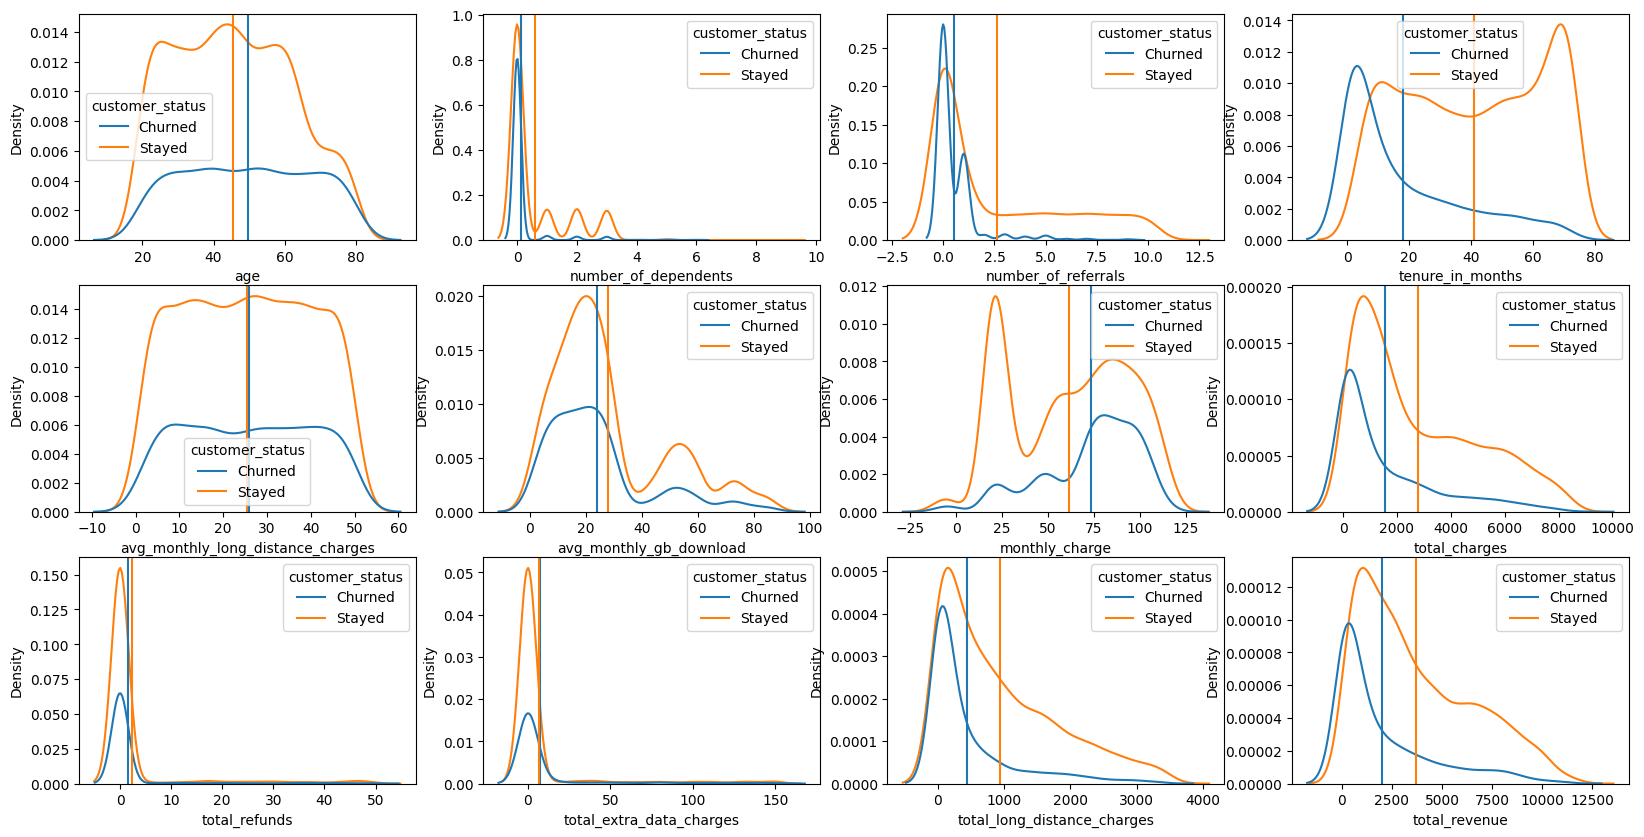

In [63]:
# plot to see each numerical variables distribution
num_EDA = dataset.select_dtypes(include=['int64','float64']).columns.to_list()

plt.figure(figsize = (20, 10))

for i in range(len(num_EDA)):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(data = dataset, x = dataset[num_EDA[i]], hue = "customer_status")
    plt.axvline(dataset_churned[num_EDA[i]].mean(), 0, 1, color = "#1f77b4")
    plt.axvline(dataset_stayed[num_EDA[i]].mean(), 0, 1, color = "#ff7f0e")


In [ ]:
# avg_monthly_long_distance_charges: mean of 2 class almost the same, no need to do imputation based on class
# avg_monthly_gb_download: mean of 2 class almost the same, no need to do imputation based on class

/tmp/ipykernel_312/3861824210.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axis = plt.subplot(4, 5, a)


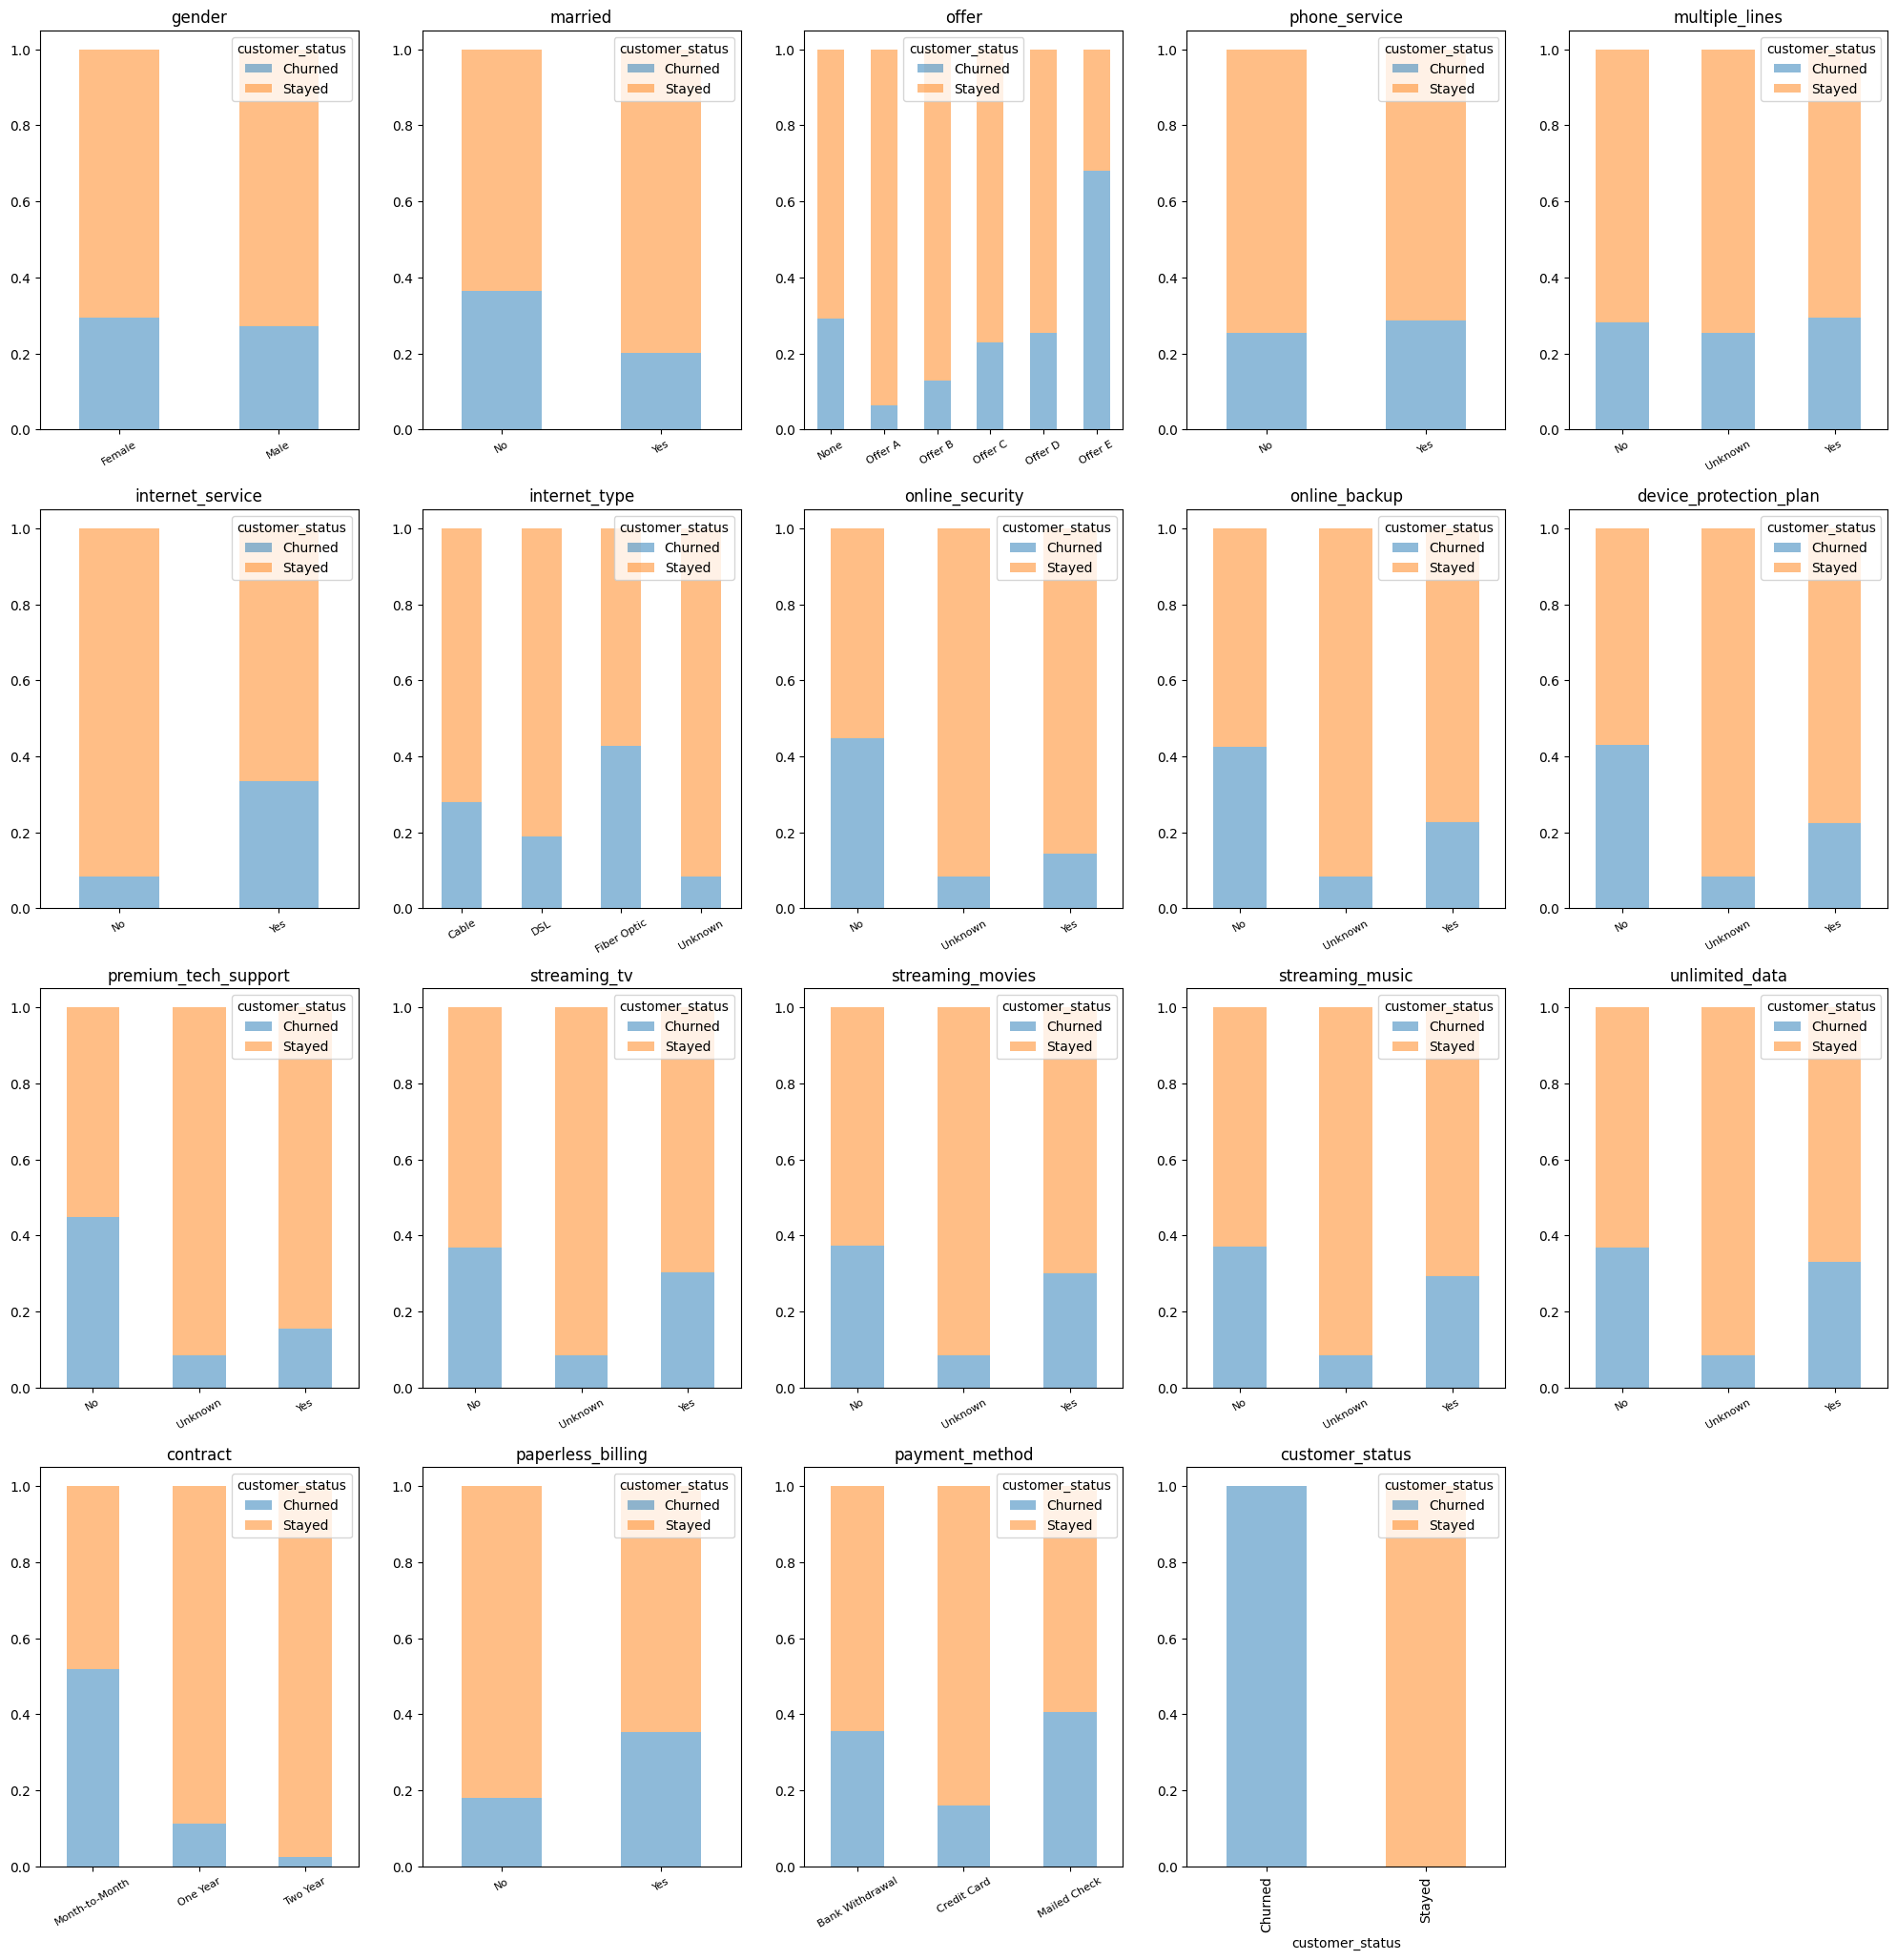

In [80]:
# plot to see each numerical variables distribution
cat_EDA = dataset.select_dtypes(include=['object']).columns.to_list()
a = 1

for i in cat_EDA:
    plt.xlabel(None)
    plt.xticks(fontsize=8, rotation=30)
    axis = plt.subplot(4, 5, a)
    a += 1
    pd.crosstab(index=dataset[i], columns=dataset['customer_status'], normalize=0).plot(kind='bar', stacked=True, ax=axis, figsize=(25,25), alpha=0.5)
    axis.title.set_text(i)   
plt.show()

In [ ]:
# the catgerical variables do not contain many values, we can do the OHE for the feature engineering

## Correlation

/tmp/ipykernel_312/1641712580.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(dataset.corr(), dtype=bool)))


<Axes: >

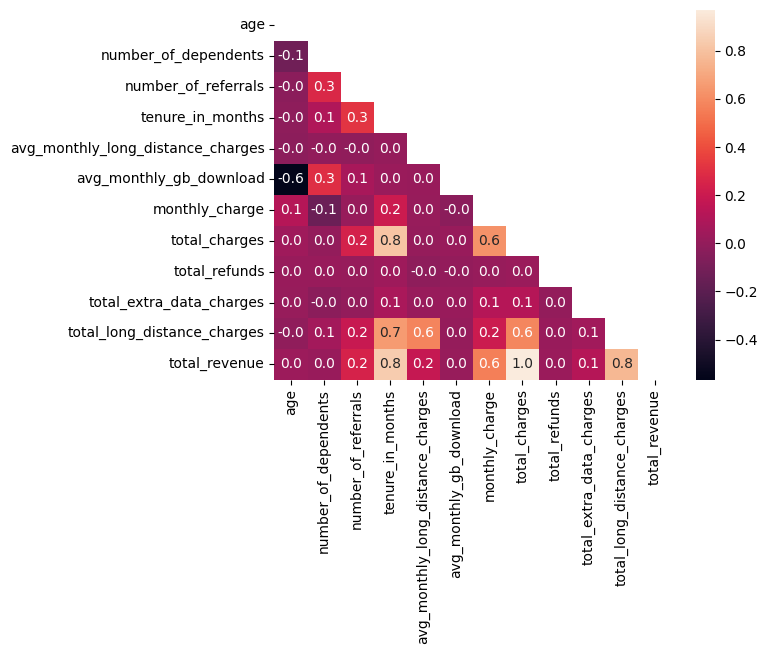

In [60]:
# visualize pearson correlation
sns.heatmap(dataset.corr(numeric_only = True), 
            annot = True, 
            fmt = '.1f',
            mask = np.triu(np.ones_like(dataset.corr(), dtype=bool)))

## T-Test

In [ ]:
# h0    = mean variable for class 0 = mean variable for class 1
# h1    = mean variable for class 0 != mean variable for class 1

In [88]:
# perform t-test for 2 variables
for num_var in num_EDA:
    scs.ttest_ind(
        dataset_churned[dataset_churned[num_var].isnull() != True][num_var],
        dataset_stayed[dataset_stayed[num_var].isnull() != True][num_var]
    )

    # calculate t critical for alpha = 0.05
    result = scs.t.ppf(0.05, df = (len(dataset) - 2))

    # print result
    if result < 0.05:
        print(f"{num_var}: Reject H0. Mean between class 0 dan 1 for {num_var} ARE statistically significant")
    else:
        print(f"{num_var}: No evidence to reject H0. Mean between class 0 dan 1 for {num_var} are NOT statistically significant")

age: Reject H0. Mean between class 0 dan 1 for age ARE statistically significant
number_of_dependents: Reject H0. Mean between class 0 dan 1 for number_of_dependents ARE statistically significant
number_of_referrals: Reject H0. Mean between class 0 dan 1 for number_of_referrals ARE statistically significant
tenure_in_months: Reject H0. Mean between class 0 dan 1 for tenure_in_months ARE statistically significant
avg_monthly_long_distance_charges: Reject H0. Mean between class 0 dan 1 for avg_monthly_long_distance_charges ARE statistically significant
avg_monthly_gb_download: Reject H0. Mean between class 0 dan 1 for avg_monthly_gb_download ARE statistically significant
monthly_charge: Reject H0. Mean between class 0 dan 1 for monthly_charge ARE statistically significant
total_charges: Reject H0. Mean between class 0 dan 1 for total_charges ARE statistically significant
total_refunds: Reject H0. Mean between class 0 dan 1 for total_refunds ARE statistically significant
total_extra_data_

## Imbalance Label

In [64]:
dataset.customer_status.value_counts()

Stayed     3304
Churned    1308
Name: customer_status, dtype: int64

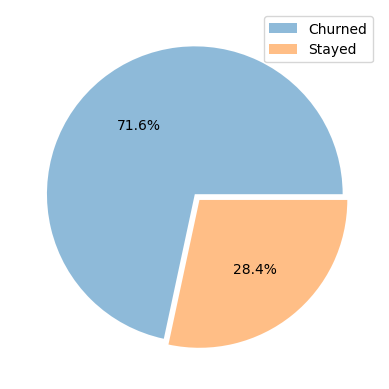

In [75]:
plt.pie(dataset['customer_status'].value_counts(), explode = (0, 0.05), autopct='%1.1f%%', wedgeprops={'alpha':0.5})
plt.legend(['Churned', 'Stayed'])
plt.show()

<Axes: xlabel='customer_status', ylabel='Count'>

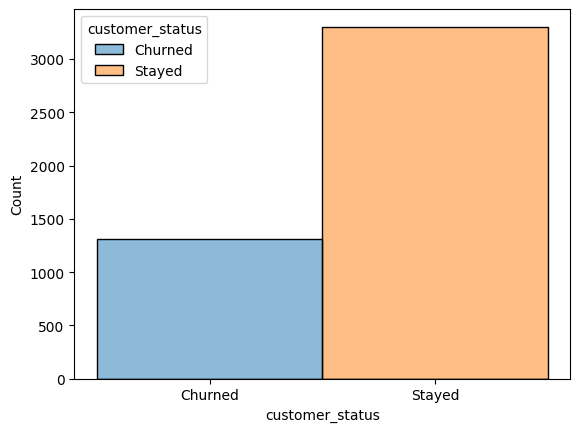

In [65]:
sns.histplot(data = dataset, x = "customer_status", hue = "customer_status")

## Outliers Checking

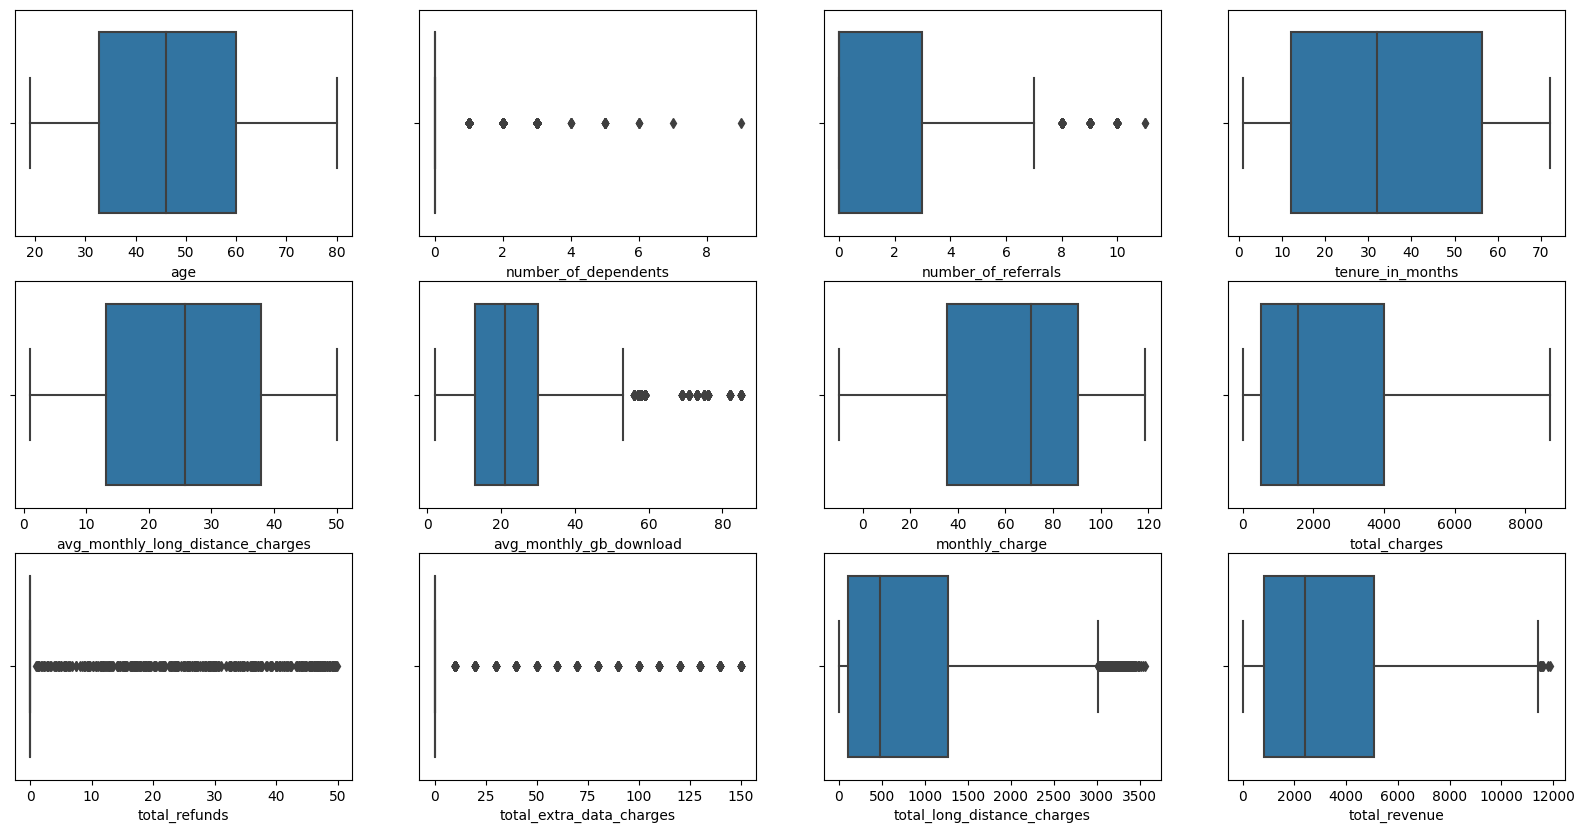

In [68]:
# check outliers using boxplot
plt.figure(figsize = (20, 10))

for i in range(len(num_EDA)):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data = dataset, x = dataset[num_EDA[i]])

In [119]:
# count outliers
list_number_of_outliers = []

for num_var in num_EDA:
    q1 = dataset.describe()[num_var]['25%']
    q3 = dataset.describe()[num_var]['75%']
    iqr = q3 - q1
    upper_fence = q3 + (1.5 * iqr)
    lower_fence = q1 - (1.5 * iqr)

    # count number of outliers in 'total_refunds'
    number_of_outliers = len(dataset[(dataset[num_var] < lower_fence) | (dataset[num_var] > upper_fence)])
    list_number_of_outliers.append(number_of_outliers)

# create dataframe
outliers_df = pd.DataFrame({'columns': num_EDA, 'outliers_count':list_number_of_outliers})
outliers_df['outliers_percentage'] = round(outliers_df['outliers_count'] / len(dataset) * 100)
outliers_df


,columns,outliers_count,outliers_percentage
0,age,0,0.0
1,number_of_dependents,1065,23.0
2,number_of_referrals,454,10.0
3,tenure_in_months,0,0.0
4,avg_monthly_long_distance_charges,0,0.0
5,avg_monthly_gb_download,436,9.0
6,monthly_charge,0,0.0
7,total_charges,0,0.0
8,total_refunds,356,8.0
9,total_extra_data_charges,466,10.0


In [120]:
# some fetaures, particularly number_of_dependents, total_refunds, total_extra_data_charges contain high number of outliers and highly skewed

# Conclusion

1. Missing value handling
    - avg_monthly_long_distance_charges: mean
    - avg_monthly_gb_download: median 
    - all categorical variables: keep with "Unknown"
2. Label balancing
3. OHE for all categorical variables
4. Drop highly skewed columns with too many outliers: number_of_dependents, total_refunds, total_extra_data_charges
5. Remove outliers